In [4]:
import tensorflow as tf
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [6]:
data = pd.read_excel('E:/Hackathan Materials/Dataset/sarcopenia.xlsx')

In [7]:
#data = pd.read_csv("E:/Hackathan Materials/Dataset/sarcopenia.csv")


In [8]:
data.shape

(251, 9)

In [9]:
data.ndim

2

In [10]:
data.head()

,ID,Sex,Sarcopenia,Age,BMI,Risk & Malnutrition,Gait_Speed,Grip_Strength,Muscle mass
0,1,2,1,79,22.968750,1,0.70,26.0,5.70
1,2,1,1,80,19.596458,0,1.04,24.7,6.64
2,3,2,1,73,20.735598,1,0.46,12.2,4.90
3,4,1,0,67,23.243408,1,1.00,31.4,8.40
4,5,1,0,68,31.476489,0,0.65,45.9,10.60


In [12]:
data.sample(10)

,ID,Sex,Sarcopenia,Age,BMI,Risk & Malnutrition,Gait_Speed,Grip_Strength,Muscle mass
10,11,1,0,84,25.510204,0,0.96,27.6,7.97
58,60,1,0,76,24.274804,0,0.92,34.0,7.98
66,70,2,0,66,24.141519,0,1.02,19.1,7.73
224,234,1,1,69,15.430000,1,1.10,16.4,5.43
207,215,1,0,70,27.929688,0,0.62,22.0,10.59
247,257,2,0,68,25.636917,1,1.03,18.5,6.69
111,117,1,0,65,21.114833,1,1.24,36.5,6.94
149,155,1,0,61,18.285714,1,1.30,34.3,7.47
245,255,2,0,71,28.316327,0,0.62,13.2,7.32
204,212,1,1,76,16.359310,1,0.84,25.9,6.08


In [13]:
data.columns

Index(['ID', 'Sex', 'Sarcopenia', 'Age', 'BMI', 'Risk & Malnutrition',
       'Gait_Speed', 'Grip_Strength', 'Muscle mass'],
      dtype='object')

In [14]:
data.dtypes

ID                       int64
Sex                      int64
Sarcopenia               int64
Age                      int64
BMI                    float64
Risk & Malnutrition      int64
Gait_Speed             float64
Grip_Strength          float64
Muscle mass            float64
dtype: object

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   251 non-null    int64  
 1   Sex                  251 non-null    int64  
 2   Sarcopenia           251 non-null    int64  
 3   Age                  251 non-null    int64  
 4   BMI                  251 non-null    float64
 5   Risk & Malnutrition  251 non-null    int64  
 6   Gait_Speed           251 non-null    float64
 7   Grip_Strength        251 non-null    float64
 8   Muscle mass          251 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 17.8 KB


In [16]:
data.describe()

,ID,Sex,Sarcopenia,Age,BMI,Risk & Malnutrition,Gait_Speed,Grip_Strength,Muscle mass
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.00000,251.000000,251.000000,251.000000
mean,130.601594,1.422311,0.334661,71.585657,23.402251,0.59761,0.922207,22.977291,7.145857
std,75.294360,0.494914,0.472815,7.570181,4.353839,0.49136,0.532354,8.103451,1.345982
min,1.000000,1.000000,0.000000,60.000000,15.039448,0.00000,0.080000,5.300000,3.520000
25%,65.500000,1.000000,0.000000,65.000000,20.389082,0.00000,0.760000,17.200000,6.235000
50%,131.000000,1.000000,0.000000,71.000000,22.939751,1.00000,0.890000,22.100000,7.030000
75%,194.500000,2.000000,1.000000,78.000000,26.104327,1.00000,1.040000,28.300000,7.965000
max,260.000000,2.000000,1.000000,94.000000,41.094689,1.00000,8.380000,45.900000,12.050000


In [17]:
data.isnull().sum()

ID                     0
Sex                    0
Sarcopenia             0
Age                    0
BMI                    0
Risk & Malnutrition    0
Gait_Speed             0
Grip_Strength          0
Muscle mass            0
dtype: int64

In [22]:
data['Sarcopenia'].nunique()

2

In [23]:
data['Sarcopenia'].unique()

array([1, 0], dtype=int64)

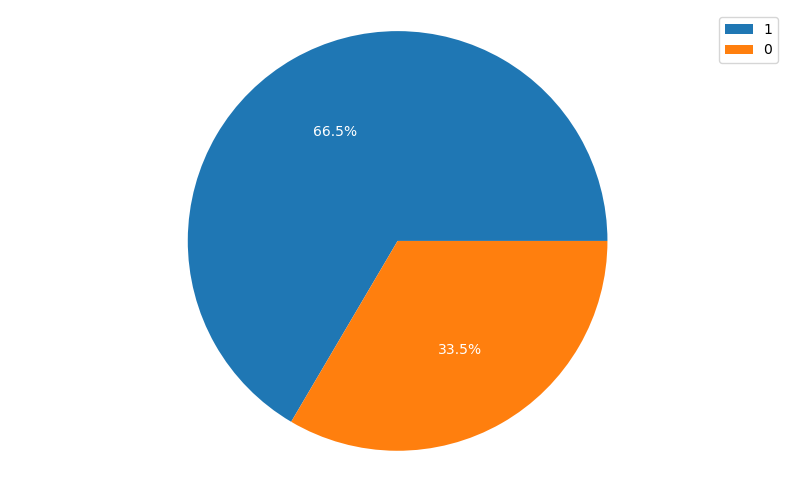

In [27]:
#Pie Chart for the Sentiments Percentage 
import matplotlib.pyplot as splt
import seaborn as sns

plt.figure(figsize=(10,6))
plt.pie(data['Sarcopenia'].value_counts(), labels= data['Sarcopenia'].unique(), autopct='%.1f%%', textprops={'color':"w"})
plt.legend(loc='upper right')
plt.axis('equal')
plt.show()

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt #for data visualizing
import seaborn as sns 
color = sns.color_palette()

[Text(0.5, 1.0, 'Correlation Matrix')]

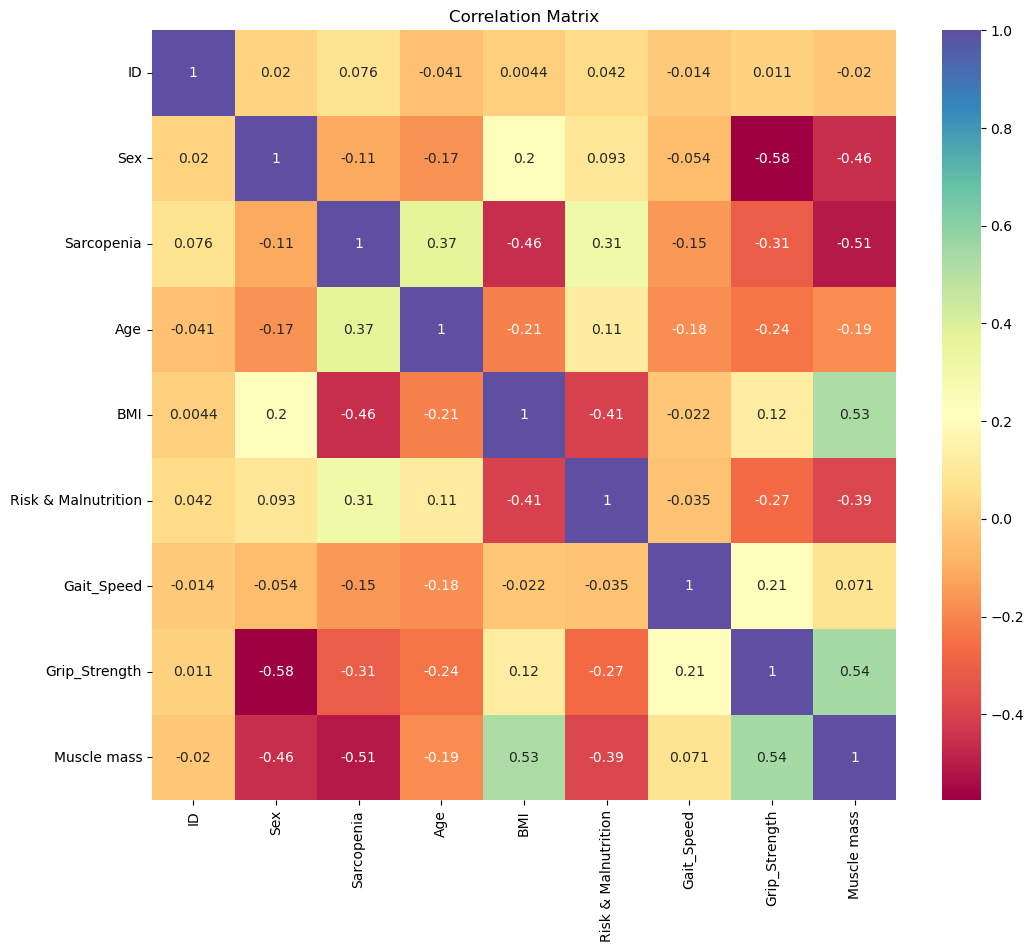

In [31]:
# Correlation matrix
corr = data.corr() 
plt.figure(figsize=(12,10))
sns.heatmap(data=corr, annot=True, cmap='Spectral').set(title="Correlation Matrix")

In [32]:
data.shape

(251, 9)

In [33]:
y = data['Sarcopenia']
x = data.drop('Sarcopenia', axis = 1)

In [34]:
print(x.shape)
print(y.shape)

(251, 8)
(251,)


In [35]:
y.head()

0    1
1    1
2    1
3    0
4    0
Name: Sarcopenia, dtype: int64

In [36]:
x.head()

,ID,Sex,Age,BMI,Risk & Malnutrition,Gait_Speed,Grip_Strength,Muscle mass
0,1,2,79,22.968750,1,0.70,26.0,5.70
1,2,1,80,19.596458,0,1.04,24.7,6.64
2,3,2,73,20.735598,1,0.46,12.2,4.90
3,4,1,67,23.243408,1,1.00,31.4,8.40
4,5,1,68,31.476489,0,0.65,45.9,10.60


In [43]:
#Importing our ML toolkit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,classification_report
from sklearn.svm import SVC
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [44]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((175, 8), (76, 8))

In [45]:
accuracy = {}

In [88]:
model2 = DecisionTreeClassifier(max_depth=35)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(accuracy_score(y_test, y_pred2))
accuracy[str(model2)] = accuracy_score(y_test, y_pred2)*100

0.8421052631578947


In [89]:
y_pred_test = model2.predict(X_test)
y_pred_train = model2.predict(X_train)

test2 = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

train = pd.DataFrame({
    'Actual':y_train,
    'Y train predicted':y_pred_train
})

In [90]:
test2.sample(20)

,Actual,Y test predicted
242,0,0
15,0,0
245,0,0
96,0,0
187,1,1
194,0,0
237,1,0
64,1,0
182,0,0
162,0,0


<AxesSubplot:>

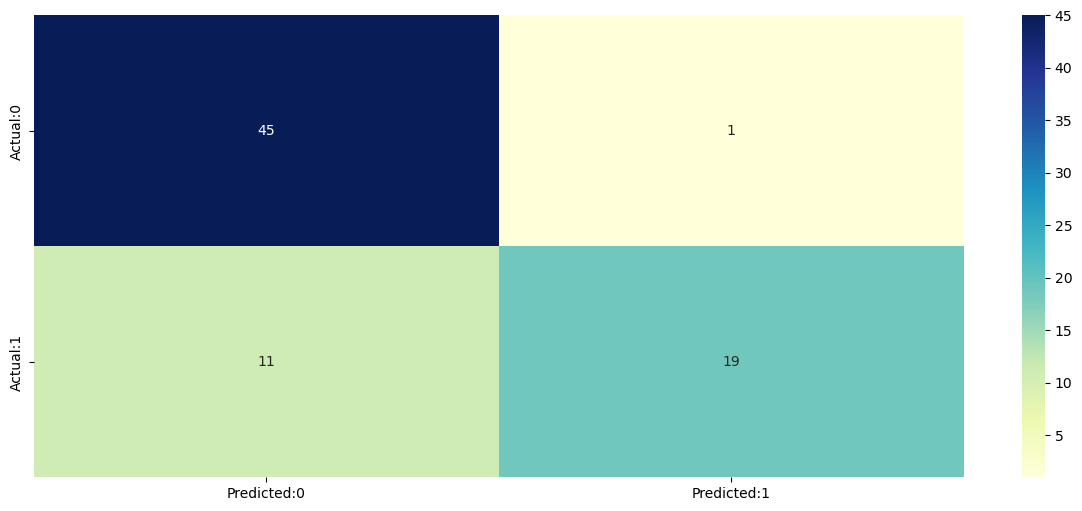

In [91]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred2)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
#conf_matrix=pd.DataFrame(data=cm,
#                         columns= [16, 21, 19, 35, 23, 15,  9, 20, 28, 18, 31, 17, 24, 14, 34, 30, 22, 26],
#                         index =  [16, 21, 19, 35, 23, 15,  9, 20, 28, 18, 31, 17, 24, 14, 34, 30, 22, 26])

plt.figure(figsize = (15,6))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [69]:
model3 = RandomForestClassifier(max_depth=25)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(accuracy_score(y_test, y_pred3))
accuracy[str(model3)] = accuracy_score(y_test, y_pred3)*100

0.9342105263157895


In [70]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        46
           1       0.96      0.87      0.91        30

    accuracy                           0.93        76
   macro avg       0.94      0.92      0.93        76
weighted avg       0.94      0.93      0.93        76



In [71]:
y_pred_test = model3.predict(X_test)
y_pred_train = model3.predict(X_train)

test3 = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

train = pd.DataFrame({
    'Actual':y_train,
    'Y train predicted':y_pred_train
})

In [72]:
test3.sample(20)

,Actual,Y test predicted
18,0,0
96,0,0
207,0,0
149,0,0
92,1,1
191,1,1
229,1,1
225,0,0
64,1,1
203,0,0


In [106]:
model1 = LogisticRegression(max_iter = 300)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(accuracy_score(y_test, y_pred1))
accuracy[str(model1)] = accuracy_score(y_test, y_pred1)*100

0.8947368421052632


In [107]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        46
           1       0.92      0.80      0.86        30

    accuracy                           0.89        76
   macro avg       0.90      0.88      0.89        76
weighted avg       0.90      0.89      0.89        76



In [108]:
y_pred_test = model1.predict(X_test)
y_pred_train = model1.predict(X_train)

test1 = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

train = pd.DataFrame({
    'Actual':y_train,
    'Y train predicted':y_pred_train
})

In [109]:
test1.sample(20)

,Actual,Y test predicted
178,1,1
8,0,0
161,1,1
15,0,0
12,1,1
89,0,1
155,1,1
199,1,1
111,0,0
45,0,0
